In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, tensor, qeye, sigmax, mesolve, fidelity,sigmaz

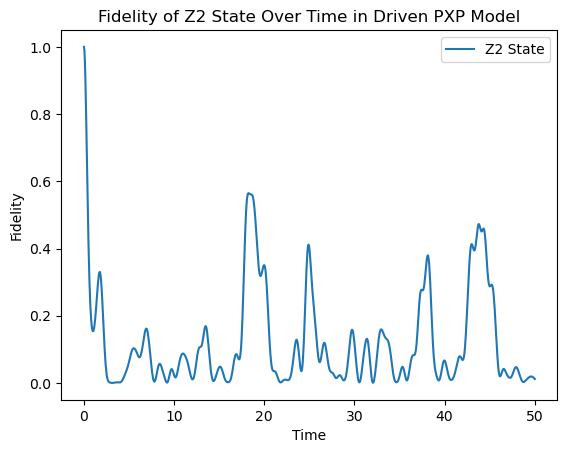

In [10]:
# Define parameters
N = 8  # Number of sites, modify as needed
Omega = 1.0  # PXP term strength
Delta_0 = 0.5  # Static detuning
Delta_m = 0.9  # Modulation amplitude
omega = 1.0  # Driving frequency
t_max = 50  # Maximum time for evolution
n_steps = 1000  # Number of time steps

# Define the projectors onto the ground state
def P_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = basis(2, 0) * basis(2, 0).dag()
    return tensor(op_list)

# Define the Pauli X operator at site j
def X_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmax()
    return tensor(op_list)

# Define the Pauli Z operator at site j
def Z_j(j, N):
    op_list = [qeye(2) for _ in range(N)]
    op_list[j] = sigmaz()
    return tensor(op_list)

# Construct the PXP Hamiltonian
H_PXP = 0
for j in range(N):
    P_j_minus = P_j((j - 1) % N, N)
    X_j_op = X_j(j, N)
    P_j_plus = P_j((j + 1) % N, N)
    H_PXP += P_j_minus * X_j_op * P_j_plus

H_PXP *= Omega

# Define the density of excitations operator
H_n = sum([Z_j(j, N) for j in range(N)])

# Define the time-dependent detuning
def Delta_t(t, Delta_0, Delta_m, omega):
    return Delta_0 + Delta_m * np.cos(omega * t)

# Define the time-dependent Hamiltonian
def H_t(t, args):
    Delta_t_val = Delta_t(t, args['Delta_0'], args['Delta_m'], args['omega'])
    return H_PXP - Delta_t_val * H_n

# Define the initial Z2 state with excitation on every other site
Z2_state = tensor([basis(2, (i % 2)) for i in range(N)])

# Time evolution parameters
tlist = np.linspace(0, t_max, n_steps)  # Time array

# Evolve the system for Z2 state with time-dependent Hamiltonian
args = {'Delta_0': Delta_0, 'Delta_m': Delta_m, 'omega': omega}
result = mesolve(H_t, Z2_state, tlist, [], [], args=args)

# Calculate fidelity with the initial Z2 state
fidelities_Z2 = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

# Plot the fidelity over time for Z2 state
plt.plot(tlist, fidelities_Z2, label='Z2 State')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z2 State Over Time in Driven PXP Model')
plt.legend()
plt.show()